## Neural Networks with PyTorch

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# import necessary packages
import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms

# define a transform to normalize the data
transform = transforms. Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

Processing...
Done!


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


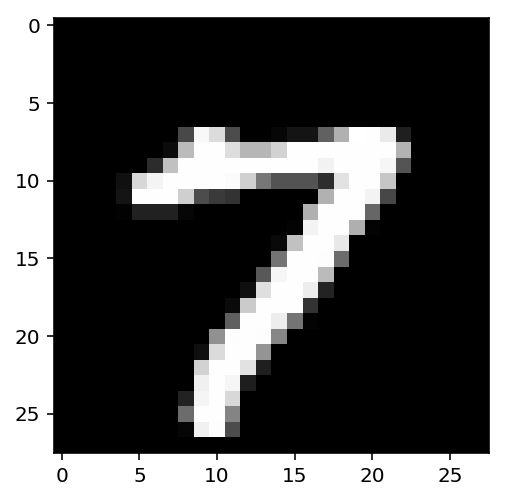

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [14]:
def activation(x):
    return 1/(1+torch.exp(-x))

# flatten the input images
inputs = images.view(images.shape[0], -1)

# create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

# h = activation(torch.mm(inputs, w1) + b1)
h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [16]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1,1)

probabilities = softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim = 1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Building networks with PyTorch

In [17]:
from torch import nn

In [18]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [19]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [20]:
import torch.nn.functional as F

In [22]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(x, self):
        x = F.sigmoid(sef.hidden(x))
        x = F.softmax(self.output(x), dim = 1)
        
        return x

In [23]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [24]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim =1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax()
)

In [25]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [26]:
model.fc1.weight
model.fc1.bias

Parameter containing:
tensor([[-0.0048, -0.0213,  0.0353,  ..., -0.0331, -0.0269,  0.0012],
        [-0.0288,  0.0116,  0.0195,  ..., -0.0115, -0.0142, -0.0187],
        [-0.0319, -0.0024,  0.0193,  ..., -0.0041, -0.0213, -0.0295],
        ...,
        [-0.0041,  0.0158, -0.0136,  ..., -0.0051, -0.0334,  0.0018],
        [ 0.0014,  0.0069,  0.0190,  ...,  0.0239, -0.0105, -0.0009],
        [ 0.0267, -0.0272,  0.0220,  ...,  0.0019,  0.0254, -0.0139]],
       requires_grad=True)

Parameter containing:
tensor([ 1.9943e-02, -2.2862e-02, -3.4880e-03,  1.6226e-02, -2.5503e-02,
        -2.3516e-02, -1.9977e-03, -5.2336e-03, -2.6561e-02,  9.8465e-03,
        -8.2610e-03, -1.4483e-02, -9.1596e-03,  4.9340e-03,  3.0165e-02,
         1.8136e-02, -1.8846e-02,  1.8615e-02,  2.8336e-02,  3.3081e-02,
        -2.8043e-02, -5.2178e-03, -1.3931e-02, -3.4195e-02, -1.6919e-02,
         1.4050e-02,  1.7589e-02,  1.7465e-02,  1.2319e-02, -2.0653e-02,
        -3.1712e-02, -2.9405e-02, -1.1232e-02, -2.3702e-04,  3.1335e-02,
        -2.9985e-02, -1.5707e-02, -6.8075e-03, -3.4461e-02,  1.5551e-02,
         4.4367e-03,  2.1798e-02, -2.1686e-02,  4.4985e-03,  3.1561e-02,
         2.0731e-02,  9.8761e-03, -2.7678e-02,  5.0443e-03, -1.5415e-02,
        -2.6384e-02, -1.4206e-02, -2.0603e-02, -7.1518e-03,  2.7945e-02,
         3.5657e-02, -2.8852e-02,  1.7490e-02, -3.2891e-02,  7.1302e-06,
         2.6084e-03,  8.9639e-03,  2.9263e-03, -2.4608e-02, -1.0348e-02,
         2.9832e-02, -2.5461e

In [27]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [28]:
model.fc1.weight.data.normal_(std = 0.01)

tensor([[ 0.0034,  0.0227, -0.0038,  ..., -0.0015, -0.0019, -0.0081],
        [ 0.0176,  0.0072, -0.0017,  ..., -0.0056,  0.0005, -0.0040],
        [ 0.0111, -0.0076, -0.0056,  ...,  0.0097,  0.0146,  0.0030],
        ...,
        [ 0.0032,  0.0161,  0.0248,  ..., -0.0026, -0.0167,  0.0061],
        [ 0.0083, -0.0051, -0.0138,  ..., -0.0032,  0.0046,  0.0003],
        [-0.0093, -0.0358, -0.0009,  ..., -0.0055,  0.0114, -0.0153]])

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        ...,

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]])

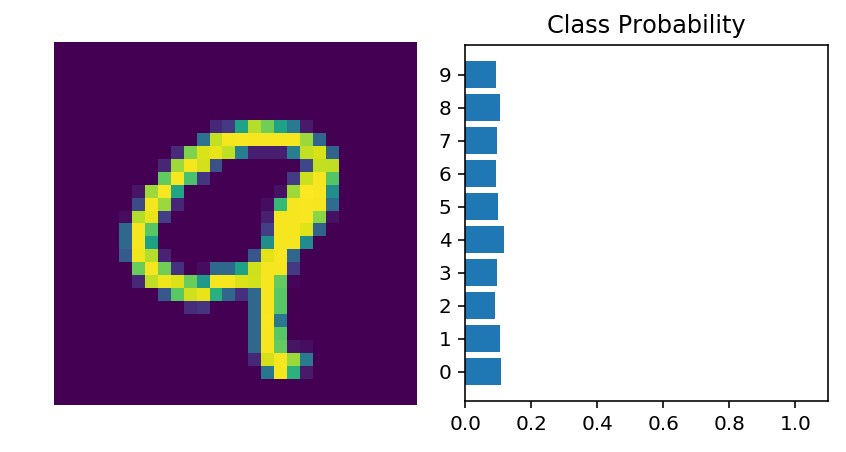

In [29]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [30]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), 
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]), 
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.Softmax(dim = 1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        ...,

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]])

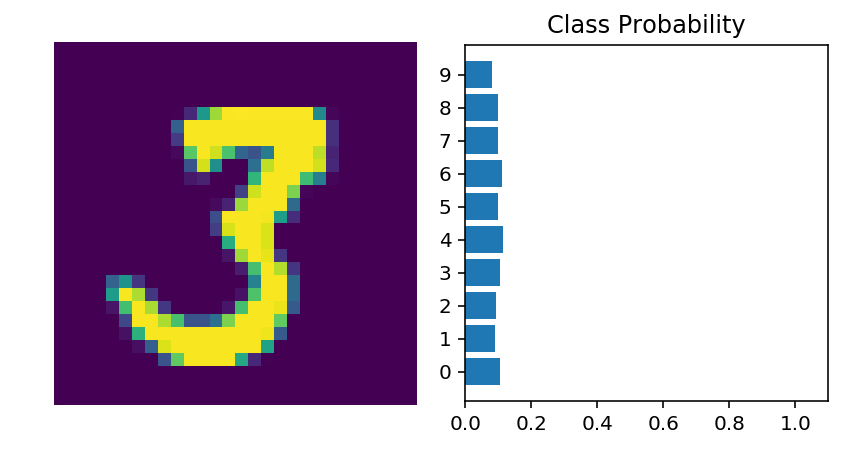

In [31]:
# forward pass
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28), ps)

In [32]:
print(model[0])
model[0].weight
model[0].bias

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0185,  0.0179,  0.0310,  ...,  0.0081, -0.0315, -0.0102],
        [ 0.0078, -0.0040,  0.0337,  ...,  0.0127,  0.0023, -0.0296],
        [ 0.0070,  0.0176,  0.0198,  ...,  0.0263, -0.0338,  0.0018],
        ...,
        [-0.0246, -0.0046, -0.0145,  ...,  0.0080, -0.0162, -0.0339],
        [ 0.0098,  0.0229, -0.0102,  ..., -0.0080,  0.0065,  0.0310],
        [-0.0206, -0.0337,  0.0090,  ..., -0.0214, -0.0258, -0.0048]],
       requires_grad=True)

Parameter containing:
tensor([ 0.0203, -0.0223,  0.0122,  0.0022,  0.0332,  0.0098, -0.0152, -0.0109,
        -0.0033, -0.0098, -0.0074,  0.0349, -0.0261, -0.0317,  0.0316,  0.0093,
         0.0325,  0.0198,  0.0051, -0.0084,  0.0139,  0.0206, -0.0195, -0.0187,
         0.0258,  0.0344,  0.0048,  0.0206,  0.0025, -0.0021,  0.0311,  0.0338,
         0.0020,  0.0077, -0.0342,  0.0012,  0.0348, -0.0115,  0.0277,  0.0098,
        -0.0132, -0.0118, -0.0010, -0.0088,  0.0166,  0.0216, -0.0003, -0.0307,
        -0.0280, -0.0259,  0.0314,  0.0022,  0.0073, -0.0086, -0.0155,  0.0158,
        -0.0119, -0.0096,  0.0280, -0.0100, -0.0269,  0.0287,  0.0261, -0.0289,
        -0.0269, -0.0261,  0.0287, -0.0103,  0.0287, -0.0089, -0.0224,  0.0046,
         0.0002, -0.0342, -0.0284, -0.0048, -0.0290, -0.0213,  0.0164, -0.0063,
        -0.0331,  0.0237,  0.0194,  0.0215, -0.0332, -0.0047,  0.0341, -0.0199,
        -0.0213,  0.0263, -0.0045, -0.0224, -0.0303, -0.0125,  0.0196,  0.0293,
        -0.0210, -

In [33]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])), 
    ('relu1', nn.ReLU()), 
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])), 
    ('relu2', nn.ReLU()), 
    ('fc3', nn.Linear(hidden_sizes[1], output_size)), 
    ('softmax', nn.Softmax(dim = 1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [35]:
model[0]
model.fc1

Linear(in_features=784, out_features=128, bias=True)

Linear(in_features=784, out_features=128, bias=True)

In [36]:
print(model[2])
print(model.fc2)

Linear(in_features=128, out_features=64, bias=True)
Linear(in_features=128, out_features=64, bias=True)
